First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?
5.) What factors helped someone survive the sinking?

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
path = "test.csv"
passenger = pd.read_csv(path)
passenger.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
passenger.shape

(418, 11)

* Dimension(Categorical Variable): Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch(? Not sure),passengerId.
* Measures(Numerical Variable): Fare, age, Sibsp and Parch

## string split

In [5]:
df1 = passenger.Name.str.split(',',expand=True).rename({0:'First Name',1:'Last Name'},axis=1)
df1

,First Name,Last Name
0,Kelly,Mr. James
1,Wilkes,Mrs. James (Ellen Needs)
2,Myles,Mr. Thomas Francis
3,Wirz,Mr. Albert
4,Hirvonen,Mrs. Alexander (Helga E Lindqvist)
...,...,...
413,Spector,Mr. Woolf
414,Oliva y Ocana,Dona. Fermina
415,Saether,Mr. Simon Sivertsen
416,Ware,Mr. Frederick


In [6]:
passenger = pd.concat([passenger,df1],axis=1)
passenger

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Last Name
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,Mr. James
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,Mrs. James (Ellen Needs)
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Mr. Thomas Francis
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Mr. Albert
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Mrs. Alexander (Helga E Lindqvist)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr. Woolf
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona. Fermina
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr. Simon Sivertsen
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr. Frederick


In [9]:
passenger['Last Name'] = passenger['Last Name'].str.split('.',expand=True)[1]

In [10]:
passenger.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Last Name
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,James
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,James (Ellen Needs)
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Thomas Francis
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Albert
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Alexander (Helga E Lindqvist)


In [42]:
passenger['age_group'] = passenger['Age'].apply(lambda x: 'Adult' if x>=18 else 'Kid')

# Part 1: Basic info about the passenger

### for categorical values: draw bar plot 

In [40]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = passenger[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("counts")
    plt.title(variable)
    plt.show()
    print(f"{variable}:\n{varValue}")
    

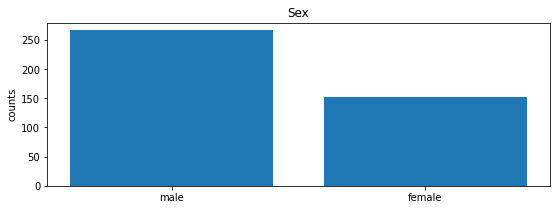

Sex:
male      266
female    152
Name: Sex, dtype: int64


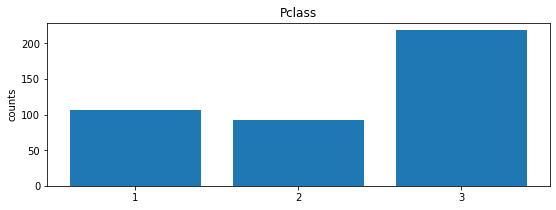

Pclass:
3    218
1    107
2     93
Name: Pclass, dtype: int64


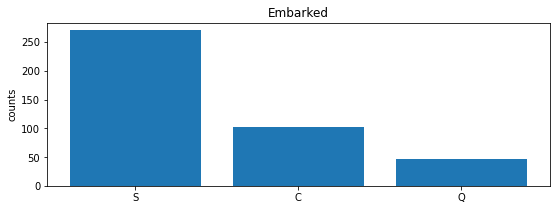

Embarked:
S    270
C    102
Q     46
Name: Embarked, dtype: int64


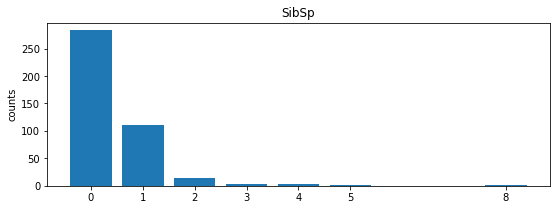

SibSp:
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64


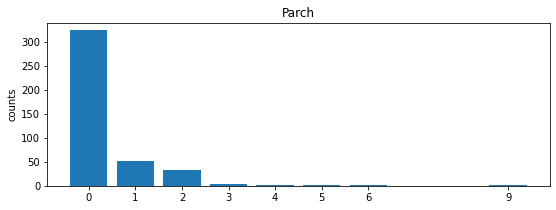

Parch:
0    324
1     52
2     33
3      3
4      2
9      2
5      1
6      1
Name: Parch, dtype: int64


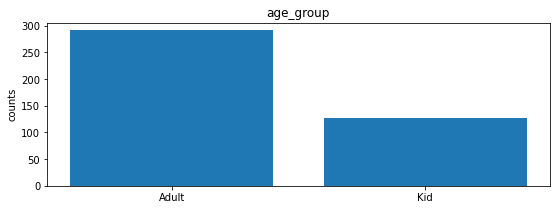

age_group:
Adult    291
Kid      127
Name: age_group, dtype: int64


In [43]:
category1 = ["Sex","Pclass","Embarked","SibSp", "Parch",'age_group']
for c in category1:
    bar_plot(c)

In [22]:
passenger.groupby(['Pclass'])['Sex'].value_counts()

Pclass  Sex   
1       male       57
        female     50
2       male       63
        female     30
3       male      146
        female     72
Name: Sex, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

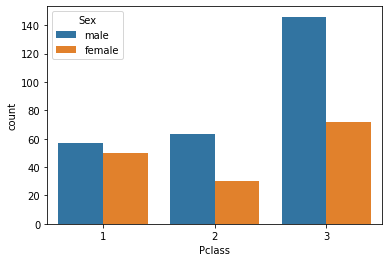

In [29]:
sns.countplot('Pclass',data=passenger,hue = 'Sex')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

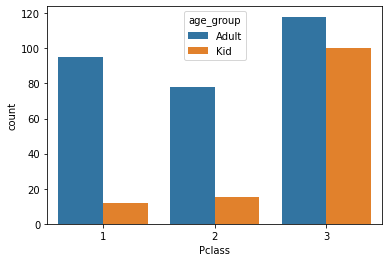

In [33]:
sns.countplot('Pclass',data = passenger,hue = 'age_group')